In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
df = pd.read_csv("/content/USvideos.csv")

In [3]:
with open("/content/US_category_id.json", "r") as f:
    cats = json.load(f)
cat_map = {int(x["id"]): x["snippet"]["title"] for x in cats["items"]}
df["category_name"] = df["category_id"].map(cat_map)


In [4]:
df["trending_date"] = pd.to_datetime(df["trending_date"], errors="coerce")
df["publish_date"] = pd.to_datetime(df["publish_time"].str[:10], errors="coerce")

/tmp/ipython-input-3782197952.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["trending_date"] = pd.to_datetime(df["trending_date"], errors="coerce")


In [5]:
df["like_rate"] = df["likes"] / df["views"].replace(0, np.nan)
df["comment_rate"] = df["comment_count"] / df["views"].replace(0,np.nan)

In [6]:
print(df["category_name"].value_counts().head(10))

category_name
Entertainment           9964
Music                   6472
Howto & Style           4146
Comedy                  3457
People & Blogs          3210
News & Politics         2487
Science & Technology    2401
Film & Animation        2345
Sports                  2174
Education               1656
Name: count, dtype: int64


In [7]:
print(df["channel_title"].value_counts().head(10))

channel_title
ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
TheEllenShow                              193
Vox                                       193
Netflix                                   193
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         186
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
Name: count, dtype: int64


In [8]:
trending_days = df.groupby(["video_id","title","channel_title"]).size().reset_index(name="days")
print(trending_days.sort_values("days", ascending=False).head(10))

         video_id                                              title  \
4759  j4KvrAUjn6c         WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
5589  r-3iathMo7o               The ULTIMATE $30,000 Gaming PC Setup   
981   8h--kFui1JA        Sam Smith - Pray (Official Video) ft. Logic   
2789  QBL8IRJ5yHU  Why I'm So Scared (being myself and crying too...   
5839  t4pRQ0jn23Q  YoungBoy Never Broke Again Goes Sneaker Shoppi...   
2467  NBSAQenU2Bk  Rooster Teeth Animated Adventures - Millie So ...   
4684  iILJvqrAQ_w                Charlie Puth - BOY [Official Audio]   
6005  ulNswX3If6U           Selena Gomez - Back To You (Lyric Video)   
327   2PH7dK6SLC8                             John Mayer - New Light   
3218  UfKmSfgFxi8         FORTNITE The Movie (Official Fake Trailer)   

          channel_title  days  
4759   Lucas and Marcus    30  
5589      Unbox Therapy    29  
981   SamSmithWorldVEVO    29  
2789      grav3yardgirl    29  
5839            Complex    29  
2467      Roost

In [9]:
df["days_to_trend"] = (df["trending_date"] - df["publish_date"]).dt.days
print(df.groupby("category_name")["days_to_trend"].mean().sort_values())

category_name
Travel & Events         -5159.369427
Autos & Vehicles        -5008.103659
Pets & Animals          -5004.240000
Science & Technology    -4926.208562
Shows                   -4819.777778
Education               -4818.819549
Howto & Style           -4715.981025
Film & Animation        -4714.098624
Sports                  -4681.711664
Nonprofits & Activism   -4652.208333
Comedy                  -4651.483283
People & Blogs          -4635.075487
Entertainment           -4623.364148
News & Politics         -4576.351896
Music                   -4558.618182
Gaming                  -4529.671642
Name: days_to_trend, dtype: float64


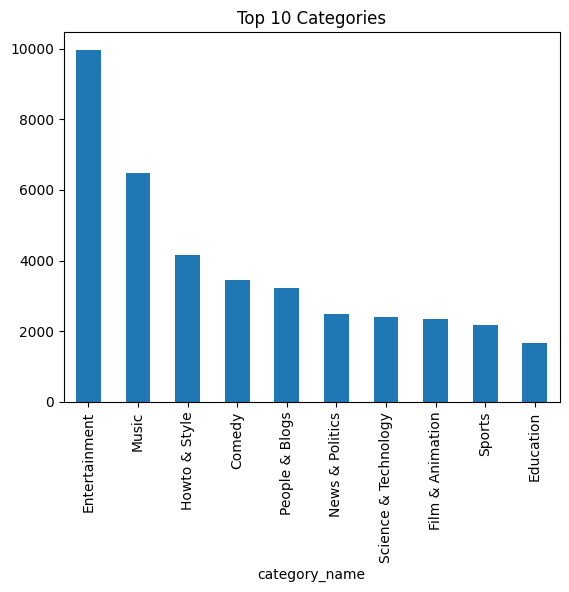

In [10]:
df["category_name"].value_counts().head(10).plot(kind="bar", title="Top 10 Categories")
plt.show()

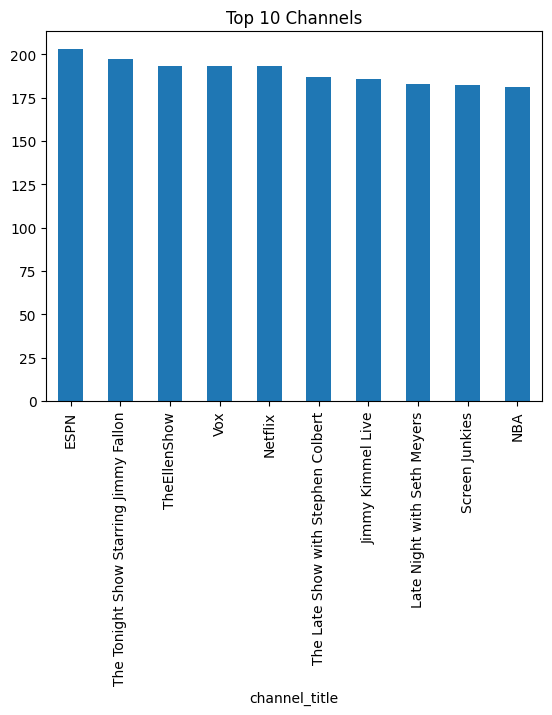

In [11]:
df["channel_title"].value_counts().head(10).plot(kind="bar", title="Top 10 Channels")
plt.show()

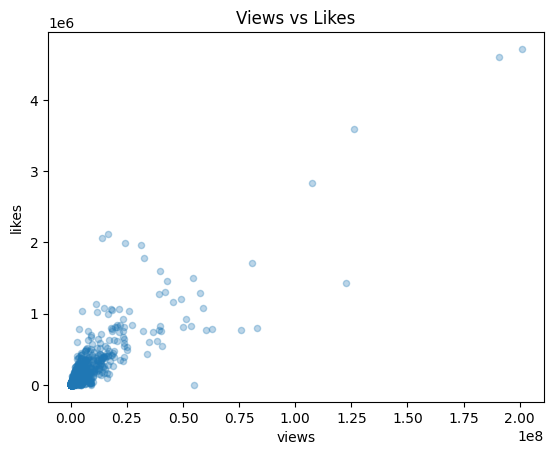

In [12]:
df.sample(3000).plot.scatter(x="views", y="likes", alpha=0.3)
plt.title("Views vs Likes")
plt.show()

In [13]:
df["category_name"].value_counts().to_csv("category_trend_counts.csv")
trending_days.to_csv("trending_days.csv", index=False)

In [14]:
from google.colab import files
files.download("category_trend_counts.csv")
files.download("trending_days.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>